# Kaggle — *House Prices: Advanced Regression Techniques*

**Objetivo:** Prever o preço de venda (`SalePrice`) das casas (Ames, Iowa) usando técnicas de pré-processamento, engenharia de features, modelos de regressão e validação cruzada.

**Fonte:** Competição do Kaggle: *House Prices - Advanced Regression Techniques*.

**Observação:** este notebook está organizado para ser executado localmente.

## 1. Contextualização do Dataset

**Introdução:** O conjunto de dados contém 79 variáveis explicativas descrevendo aspectos das residências em Ames, Iowa. A variável alvo é `SalePrice`. O desafio envolve limpeza de dados, tratamento de valores faltantes, engenharia de features e modelagem.

**Objetivos do notebook:**

- Preparação dos dados, normalização/padronização e tratamento de dados ausentes;
- Análise exploratória e estatística descritiva;
- Aplicação de técnicas de Aprendizado de Máquina: Treinamento e comparação de modelos de regressão, validação cruzada e avaliação robusta (RMSE);
- Avaliação dos resultados;
- Conclusões e próximos passos;
- Documentação e reprodutibilidade.

---


### Obtenção dos dados

1. Link: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques.
2. Download do `train.csv` e `test.csv`.

In [ ]:
# Importação das Bibliotecas:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Opcional: XGBoost
try:
    import xgboost as xgb
    has_xgb = True
except Exception:
    has_xgb = False

print('xgboost available:', has_xgb)
print('Working directory:', os.getcwd())

xgboost available: True
Working directory: /content


In [ ]:
# CARREGAMENTO DOS DADOS
# Aqui verificamos se os arquivos estão no diretório e carregamos
# o train.csv e test.csv como DataFrames do pandas.

import os
import pandas as pd

train_path = "train.csv"
test_path = "test.csv"

if not os.path.exists(train_path):
    raise FileNotFoundError(f"train.csv não encontrado. Arquivos no diretório: {os.listdir()}")

if not os.path.exists(test_path):
    raise FileNotFoundError(f"test.csv não encontrado.")

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

print("Train shape:", train.shape)
print("Test shape:", test.shape)

test = pd.read_csv(test_path)

Train shape: (1460, 81)
Test shape: (1459, 80)


## 2. Exploração Inicial

- Estatísticas básicas
- Distribuição da variável alvo
- Checagem de valores faltantes



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="viridis")

# 2.1 Estrutura inicial dos dados

print("Train shape:", train.shape)
print("Test shape:", test.shape)

print("\nPrévia dos dados:")
display(train.head())

print("\nInformações das colunas:")
train.info()

Train shape: (1460, 81)
Test shape: (1459, 80)

Prévia dos dados:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Informações das colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-nu

In [ ]:
# 2.2 Estatísticas descritivas (numéricas e categóricas)

print("\nEstatísticas descritivas - Variáveis numéricas:")
display(train.describe())

print("\nEstatísticas descritivas - Variáveis categóricas:")
display(train.describe(include=["O"]))


Estatísticas descritivas - Variáveis numéricas:


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000



Estatísticas descritivas - Variáveis categóricas:


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


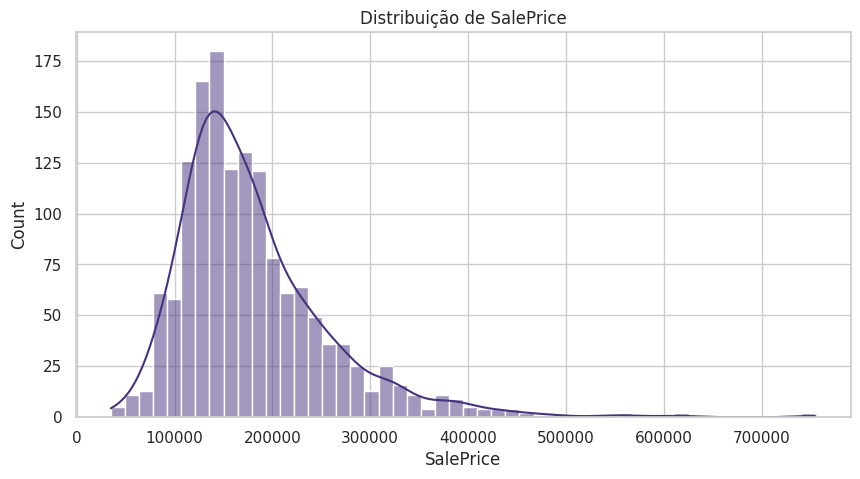

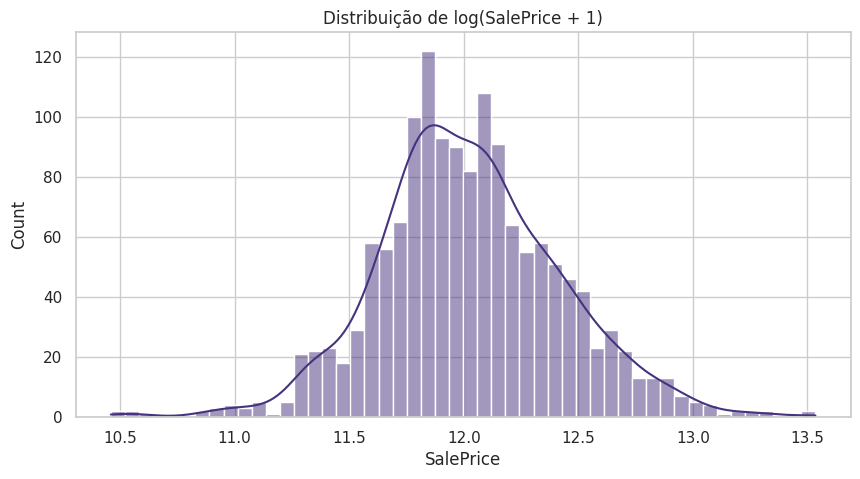

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


In [ ]:
# 2.3 Distribuição da variável alvo (SalePrice)

plt.figure(figsize=(10,5))
sns.histplot(train["SalePrice"], bins=50, kde=True)
plt.title("Distribuição de SalePrice")
plt.show()

# Log-transform
plt.figure(figsize=(10,5))
sns.histplot(np.log1p(train["SalePrice"]), bins=50, kde=True)
plt.title("Distribuição de log(SalePrice + 1)")
plt.show()

print("Skewness:", train["SalePrice"].skew())
print("Kurtosis:", train["SalePrice"].kurtosis())

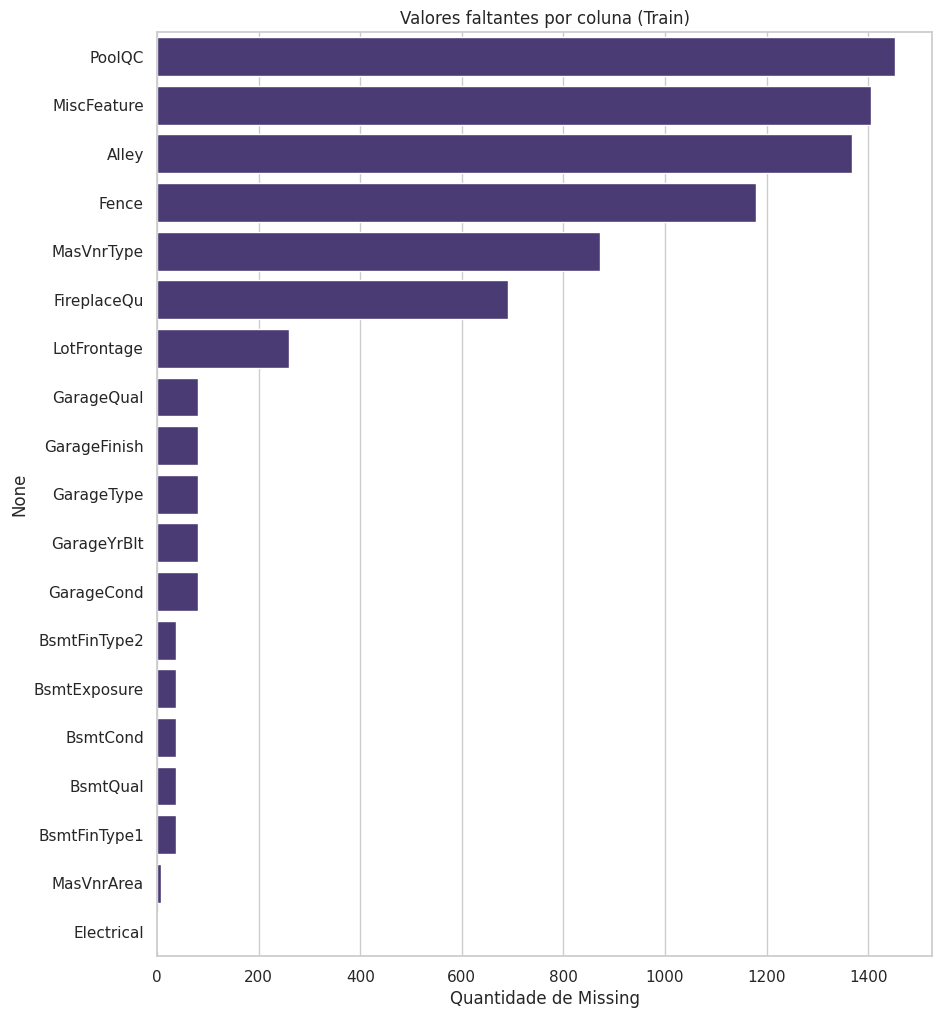


Top variáveis com mais missing:


,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


In [ ]:
# 2.4 Verificação de valores faltantes

missing = train.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]

plt.figure(figsize=(10,12))
sns.barplot(x=missing.values, y=missing.index)
plt.title("Valores faltantes por coluna (Train)")
plt.xlabel("Quantidade de Missing")
plt.show()

print("\nTop variáveis com mais missing:")
display(missing.head(20))

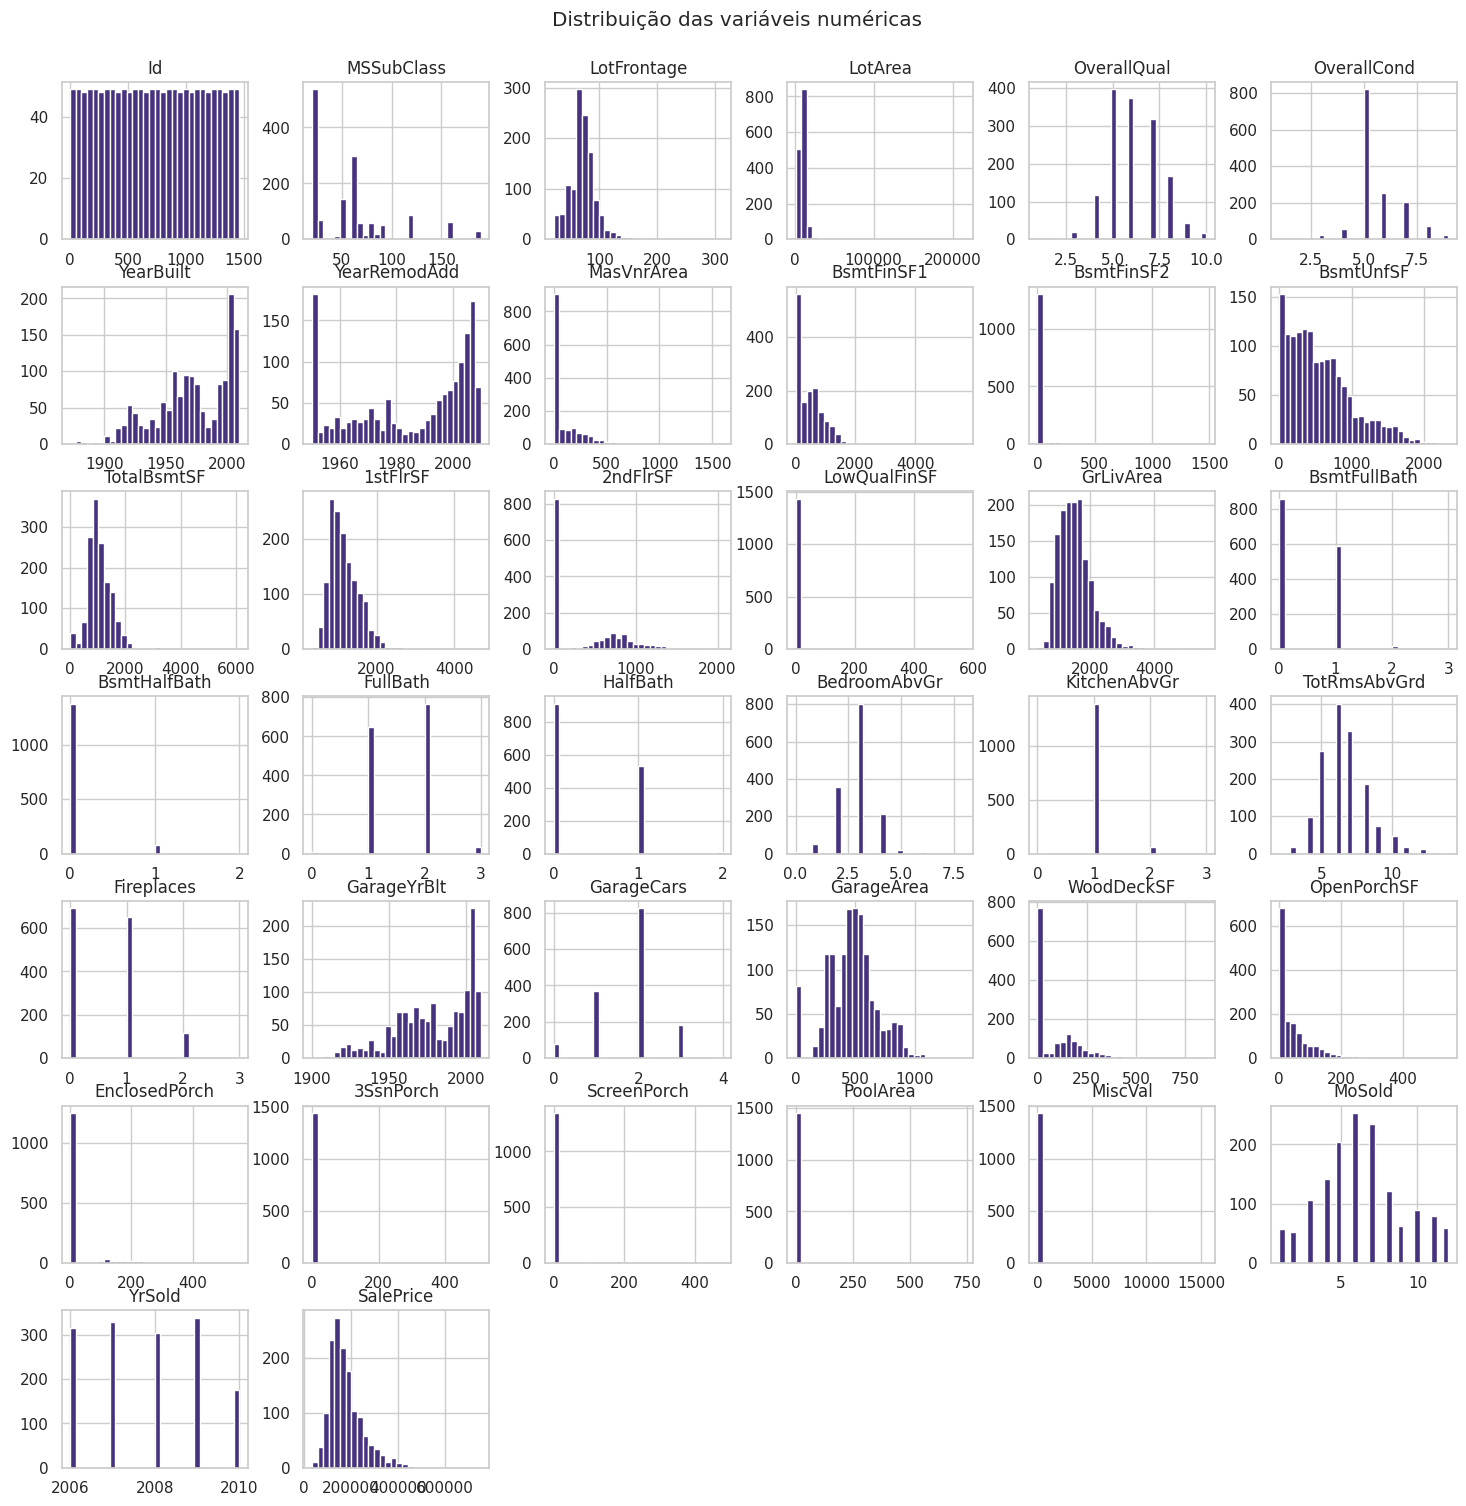

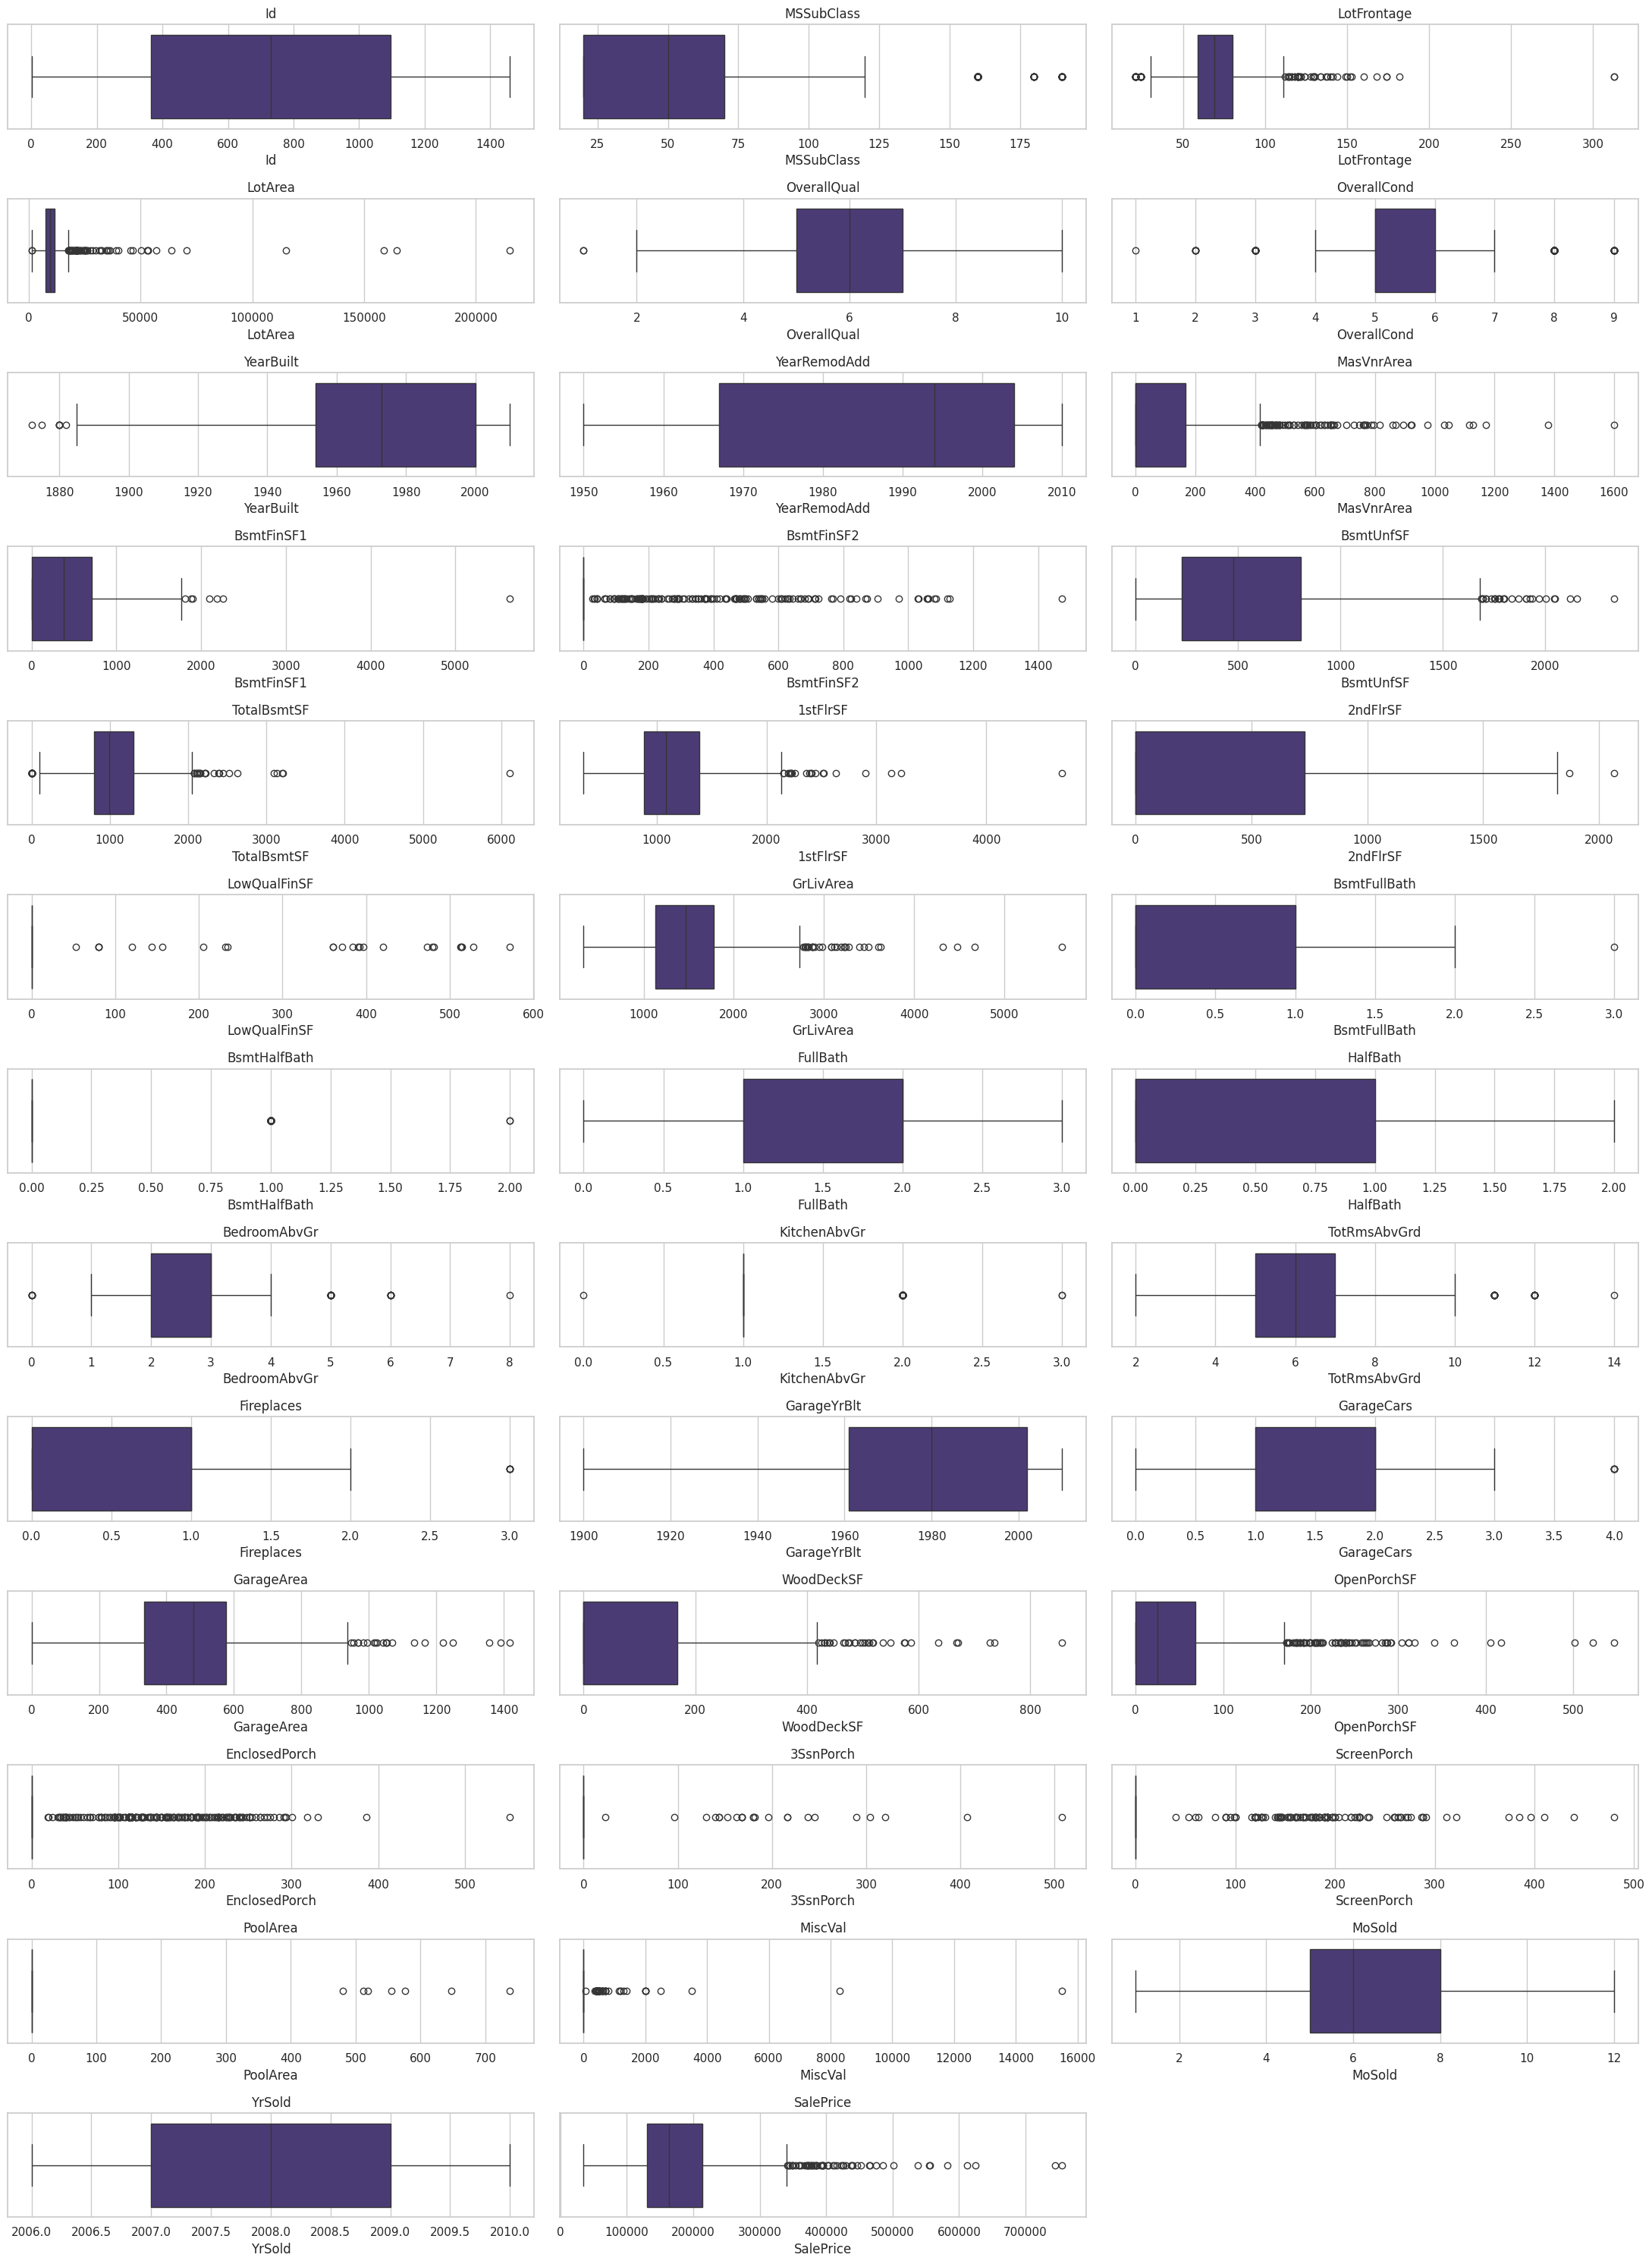

In [ ]:
# 2.5 Exploração das variáveis numéricas

num_cols = train.select_dtypes(include=[np.number]).columns

# Histograma para todas variáveis numéricas
train[num_cols].hist(figsize=(18,18), bins=30)
plt.suptitle("Distribuição das variáveis numéricas", y=0.92)
plt.show()

# Boxplots para identificar outliers
plt.figure(figsize=(22,30))
for i, col in enumerate(num_cols):
    plt.subplot(int(np.ceil(len(num_cols)/3)), 3, i+1)
    sns.boxplot(x=train[col])
    plt.title(col)
plt.tight_layout()
plt.show()

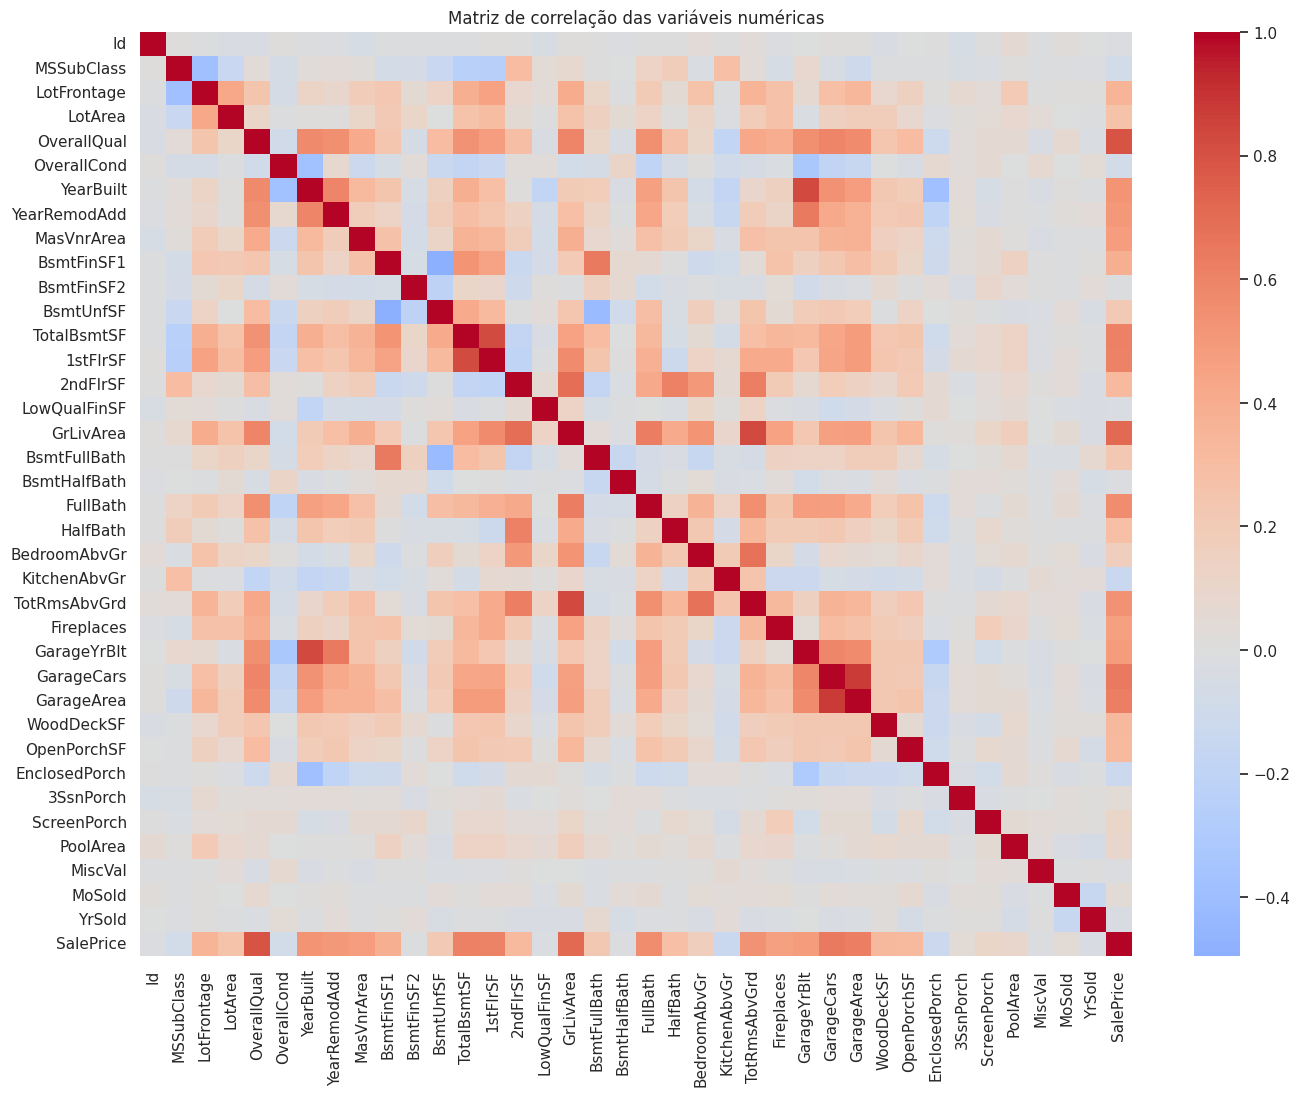

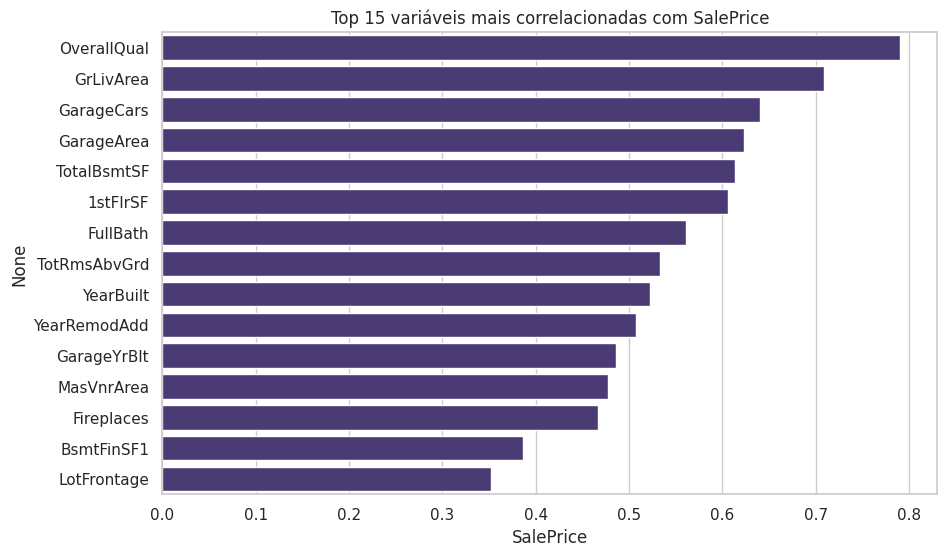

In [ ]:
# 2.6 Matriz de correlação

plt.figure(figsize=(16,12))
corr_matrix = train.corr(numeric_only=True)
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Matriz de correlação das variáveis numéricas")
plt.show()

# Top 15 mais correlacionadas com SalePrice
corr_target = corr_matrix["SalePrice"].abs().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=corr_target[1:16], y=corr_target.index[1:16])
plt.title("Top 15 variáveis mais correlacionadas com SalePrice")
plt.show()


Variáveis mais correlacionadas: ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']


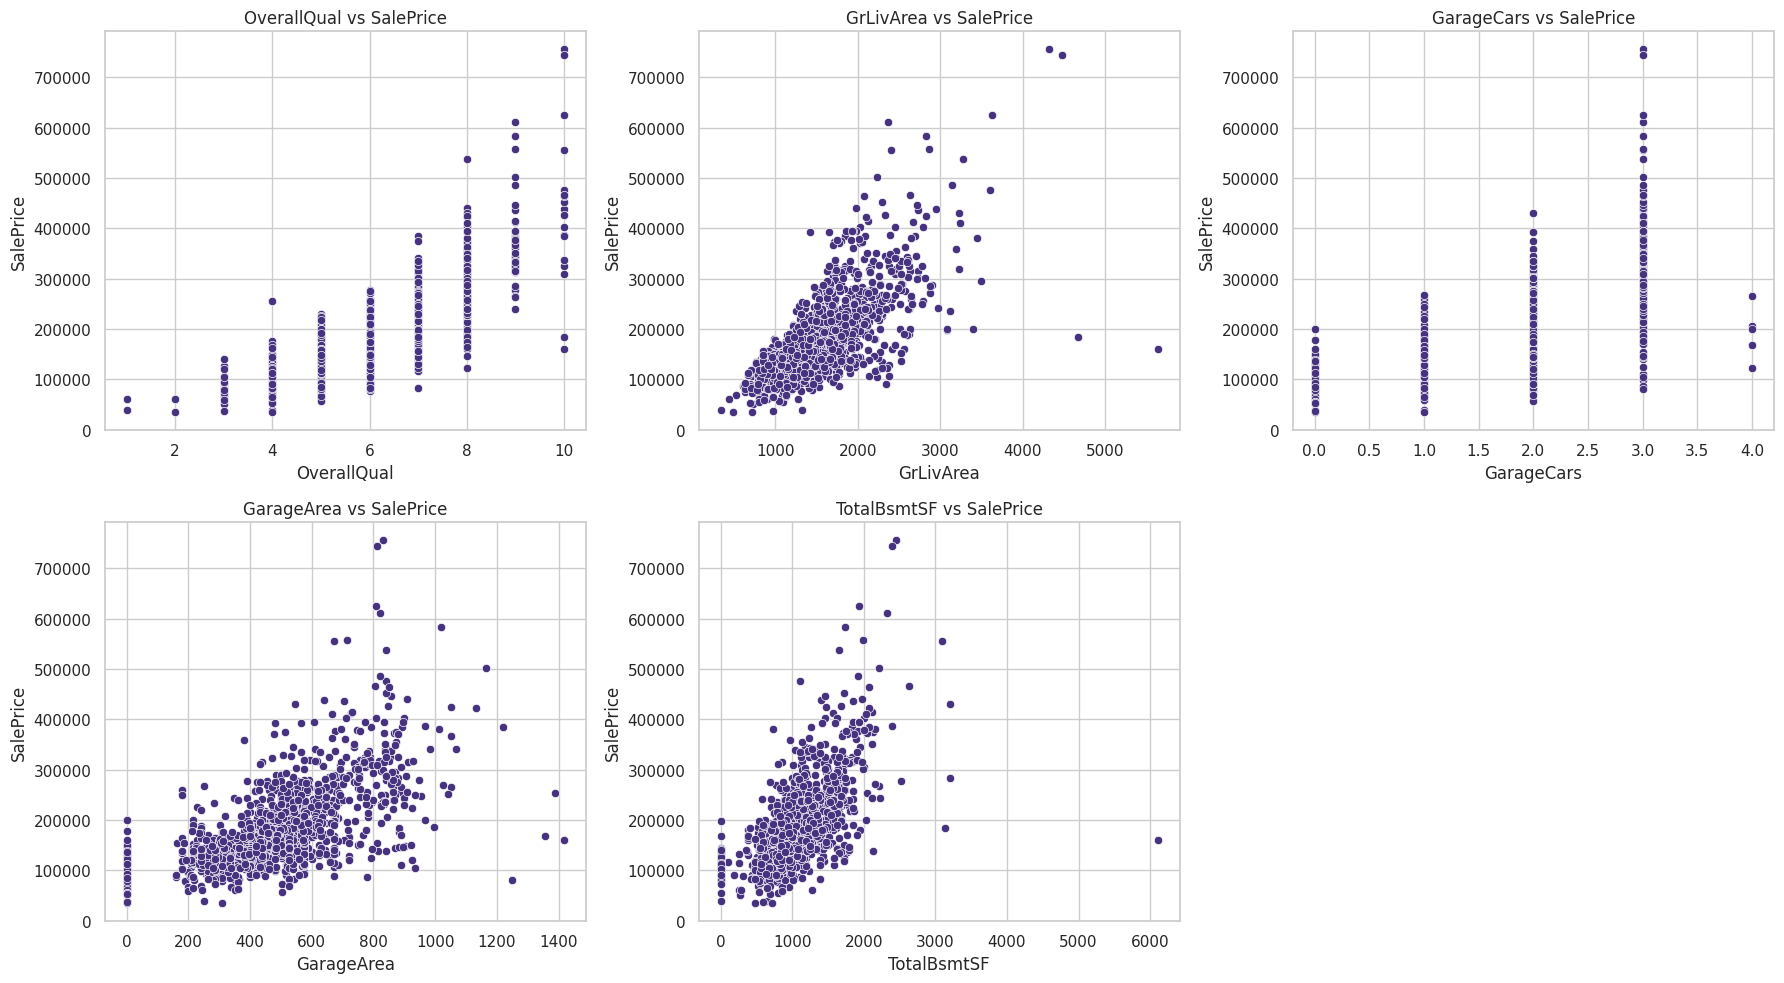

In [ ]:
# 2.7 Relações principais entre variáveis e o target

top_corr_features = corr_target.index[1:6]  # exclui SalePrice
print("\nVariáveis mais correlacionadas:", list(top_corr_features))

plt.figure(figsize=(18,10))
for i, col in enumerate(top_corr_features):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=train[col], y=train["SalePrice"])
    plt.title(f"{col} vs SalePrice")
plt.tight_layout()
plt.show()

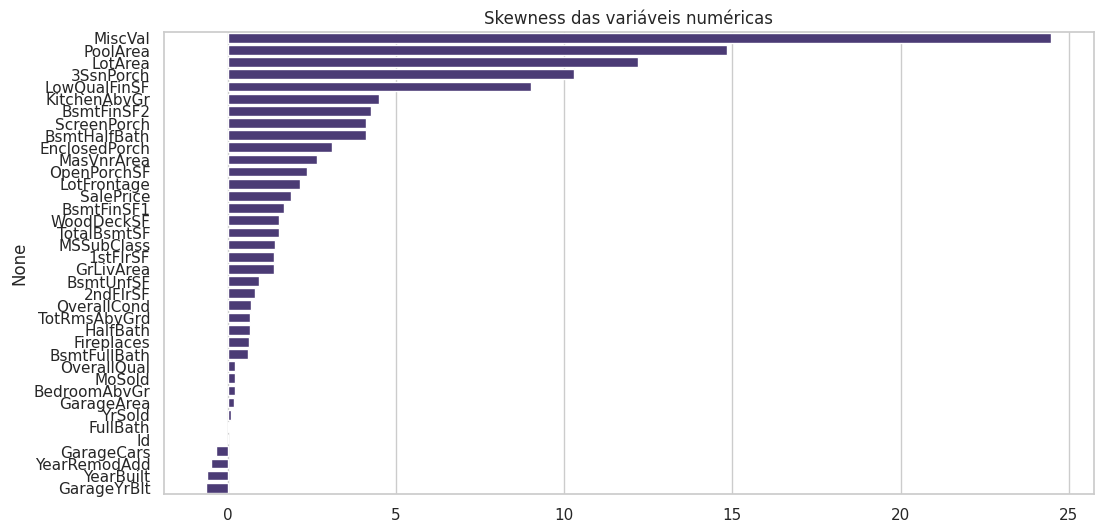

In [ ]:
# 2.8 Skewness das variáveis numéricas

skew_vals = train[num_cols].skew().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=skew_vals.values, y=skew_vals.index)
plt.title("Skewness das variáveis numéricas")
plt.show()

## 3. Preparação dos Dados

Neste passo vamos:
- Tratar valores faltantes
- Codificar variáveis categóricas
- Normalizar/Padronizar features numéricas
- Separar treino/validação


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 3.1 Separar target e prever colunas numéricas/categóricas

# Separar variável alvo
y = train['SalePrice']
X = train.drop(['SalePrice'], axis=1)

# Identificar tipos de colunas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

print("Numéricas:", len(numeric_features))
print("Categóricas:", len(categorical_features))

Numéricas: 37
Categóricas: 43


In [ ]:
# 3.2 Tratamento de dados faltantes

from sklearn.impute import SimpleImputer

# Imputação numérica: mediana evita impacto de outliers
numeric_imputer = SimpleImputer(strategy="median")

# Imputação categórica: 'Missing' mantém a informação
categorical_imputer = SimpleImputer(strategy="most_frequent")

In [ ]:
# 3.3 – Normalização / Padronização

scaler = RobustScaler()

In [ ]:
# 3.4 – Codificação de variáveis categóricas (One-Hot Encoding)

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

In [ ]:
# 3.5 – Criar o ColumnTransformer (pipeline de pré-processamento)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("imputer", numeric_imputer),
            ("scaler", scaler)
        ]), numeric_features),

        ("cat", Pipeline(steps=[
            ("imputer", categorical_imputer),
            ("encoder", encoder)
        ]), categorical_features)
    ]
)

In [ ]:
# 3.6 – Divisão treinamento/validação

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Treino:", X_train.shape)
print("Validação:", X_valid.shape)

Treino: (1022, 80)
Validação: (438, 80)


In [ ]:
# 3.7 – Aplicar o pré-processamento (sem treinar modelo ainda)

# Ajustar o pipeline nos dados de treino e transformar
X_train_processed = preprocessor.fit_transform(X_train)
X_valid_processed = preprocessor.transform(X_valid)

print("Após pré-processamento:")
print(X_train_processed.shape, X_valid_processed.shape)

Após pré-processamento:
(1022, 283) (438, 283)


In [ ]:
# 3.8 – Pré-processar também o conjunto de teste

X_test_processed = preprocessor.transform(test)

print("Teste pré-processado:", X_test_processed.shape)

Teste pré-processado: (1459, 283)


Nesta etapa foi realizada a preparação dos dados para os modelos de Machine Learning.
O dataset contém variáveis numéricas e categóricas, além de colunas com valores faltantes.
O pré-processamento foi dividido em quatro etapas principais:

- Tratamento de dados faltantes:
Numéricas: preenchidas pela mediana
Categóricas: preenchidas com o valor mais frequente

- Codificação de variáveis categóricas:
Foi utilizado One-Hot Encoding, que cria colunas binárias para cada categoria.
handle_unknown="ignore" evita falhas com categorias não vistas.

- Normalização/Padronização:
Para estabilizar modelos sensíveis a escala, foi aplicado o RobustScaler, que lida bem com outliers.

- Divisão dos dados:
O dataset foi dividido em 70% treino e 30% validação.
Como é regressão, não foi aplicado stratify.

Essa etapa garante que os modelos recebam dados limpos, consistentes e bem estruturados, reduzindo riscos de viés e melhorando a performance preditiva.

## 4. Exploração e Visualização dos dados

Visualizações: Gráficos que ajudam a entender as distribuições, correlações e possíveis outliers.

Análise de Features: Seleção de features relevantes, engenharia de features, e justificativas das escolhas.

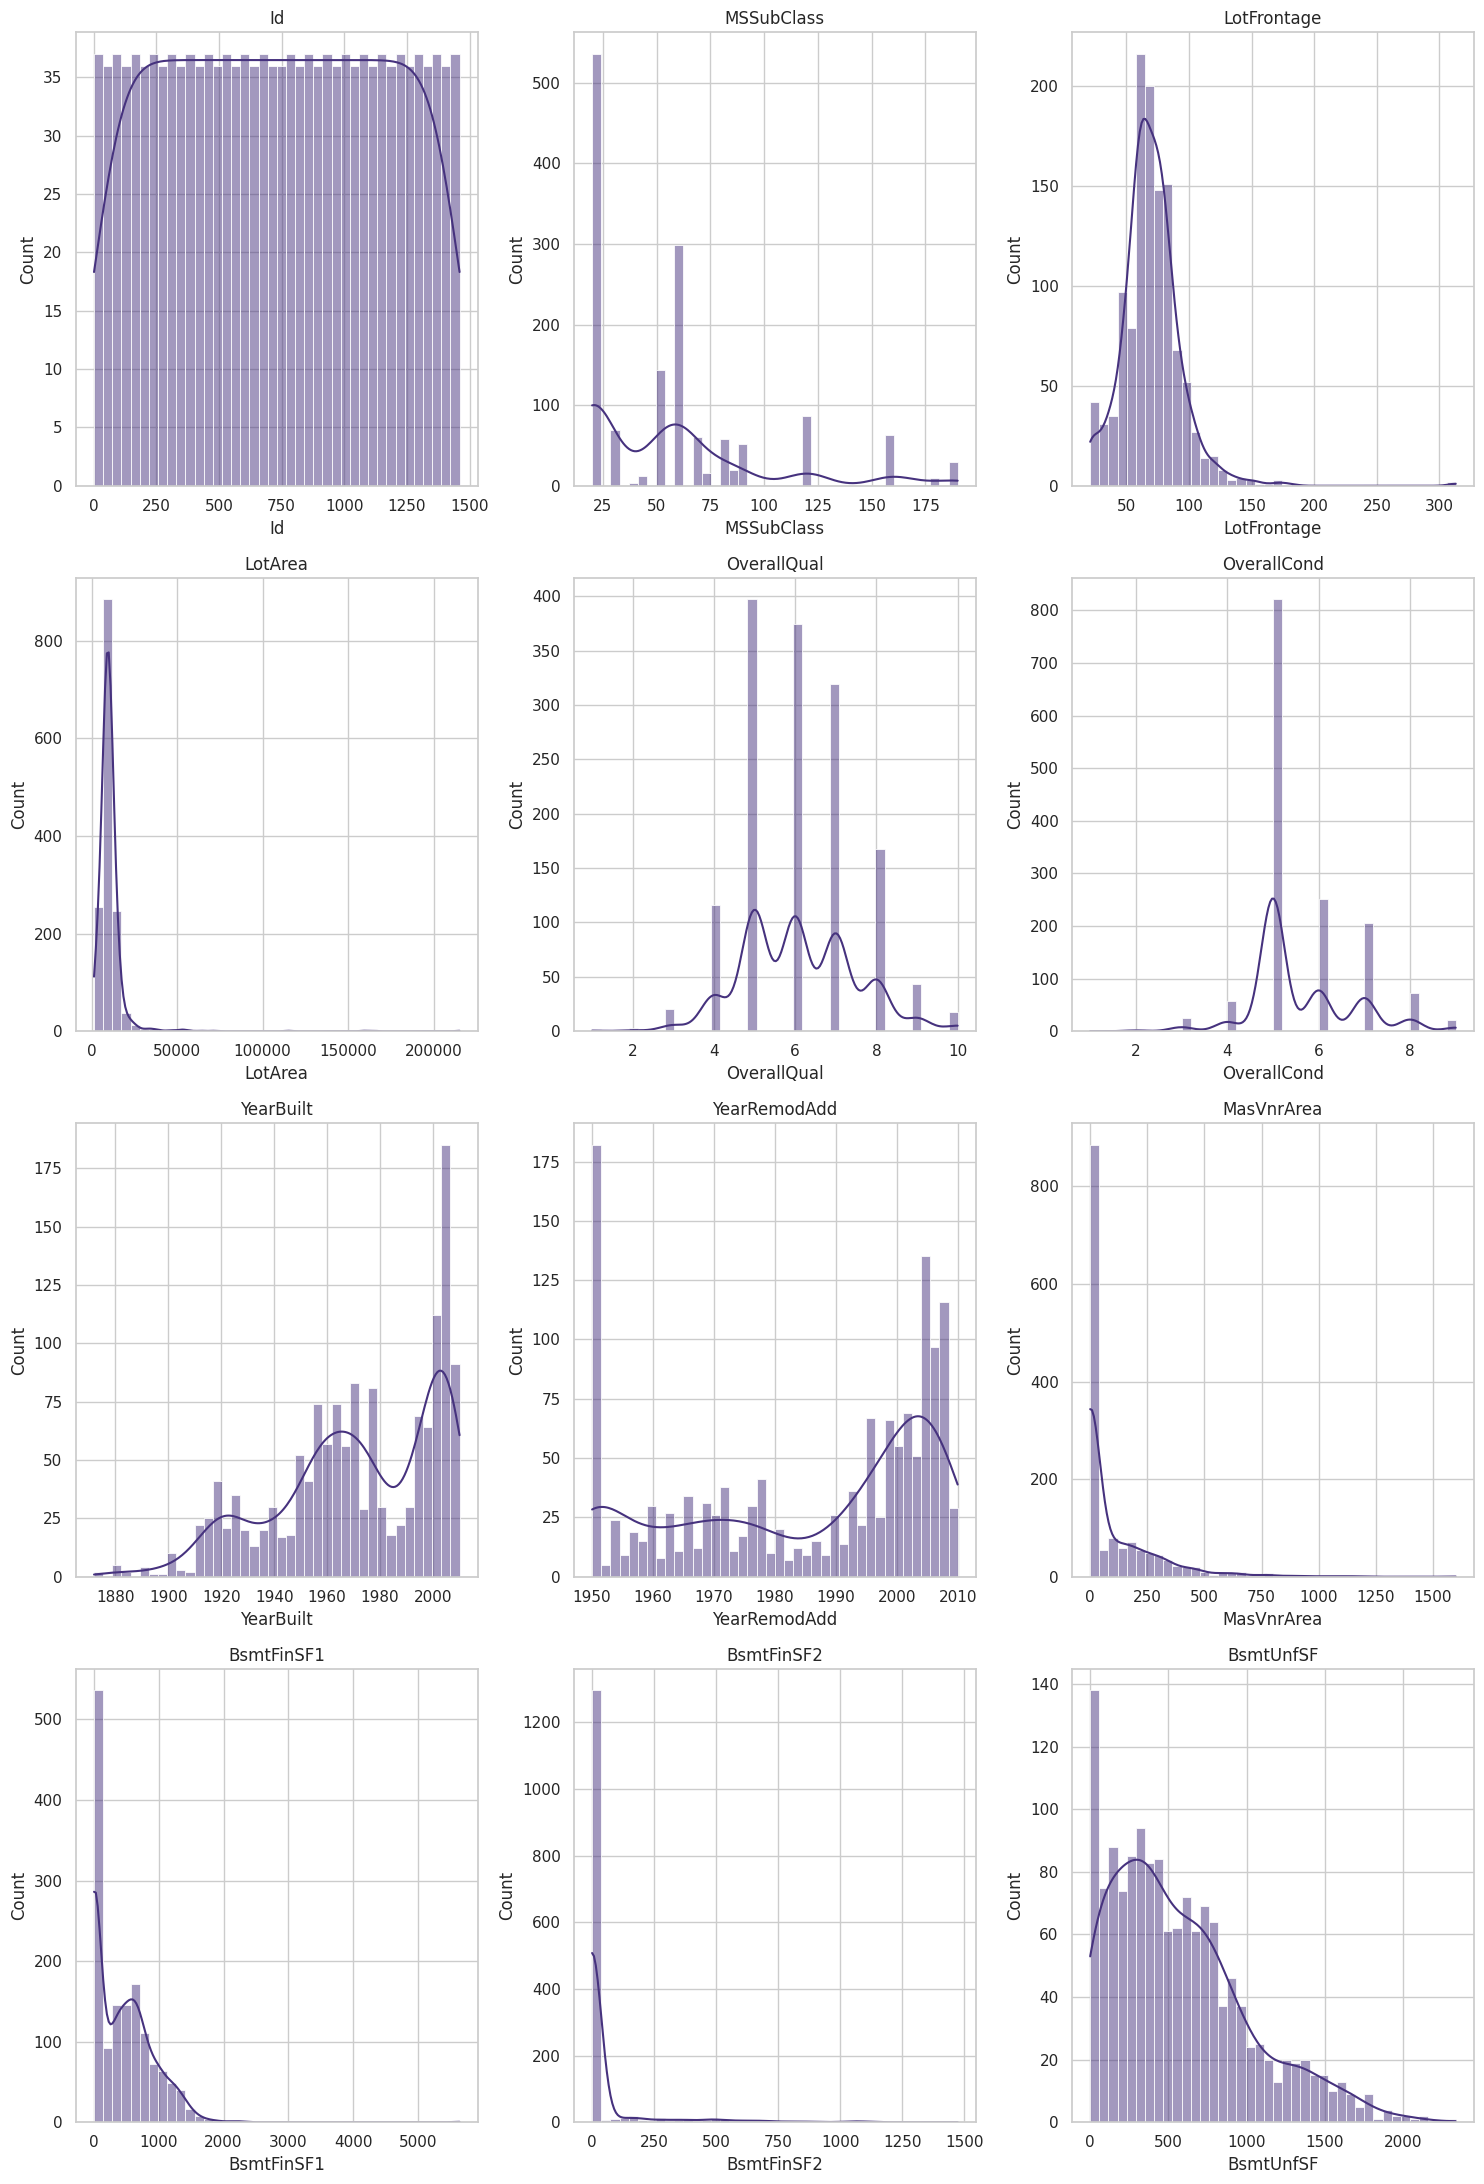

In [ ]:
# 4.1 Distribuições das principais variáveis numéricas

num_cols = train.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(15, 22))
for i, col in enumerate(num_cols[:12]):  # mostra as 12 principais
    plt.subplot(4, 3, i+1)
    sns.histplot(train[col], kde=True, bins=40)
    plt.title(col)

plt.tight_layout()
plt.show()

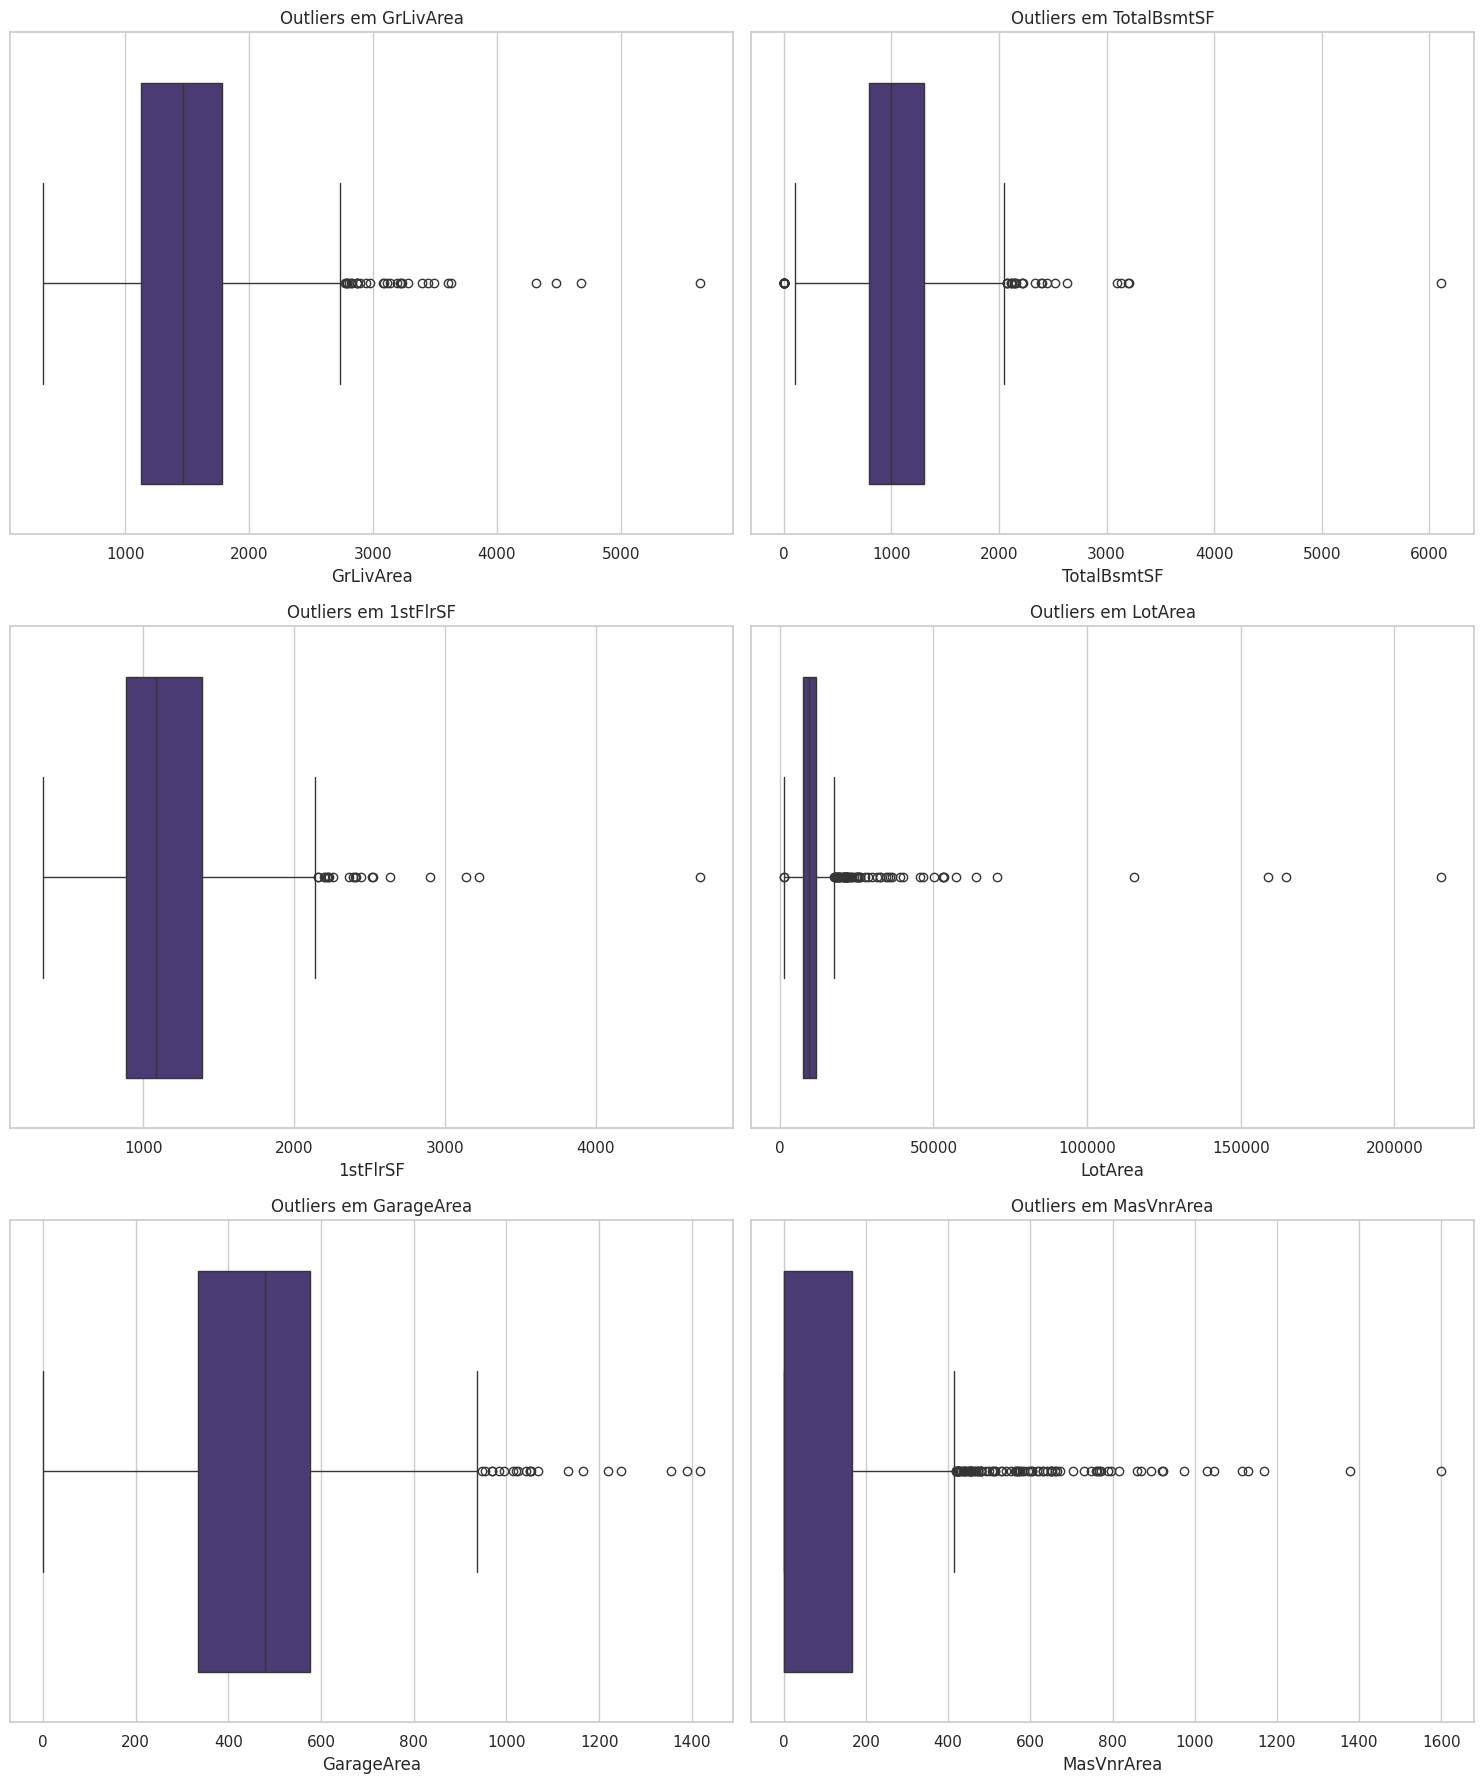

In [ ]:
# 4.2 Boxplots para detecção de outliers relevantes
# Foram Selecionadas apenas features relacionadas a tamanho, área, qualidade, ou seja, as que influenciam preço.

features_outliers = [
    'GrLivArea', 'TotalBsmtSF', '1stFlrSF',
    'LotArea', 'GarageArea', 'MasVnrArea'
]

plt.figure(figsize=(15, 18))
for i, col in enumerate(features_outliers):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=train[col])
    plt.title(f'Outliers em {col}')

plt.tight_layout()
plt.show()

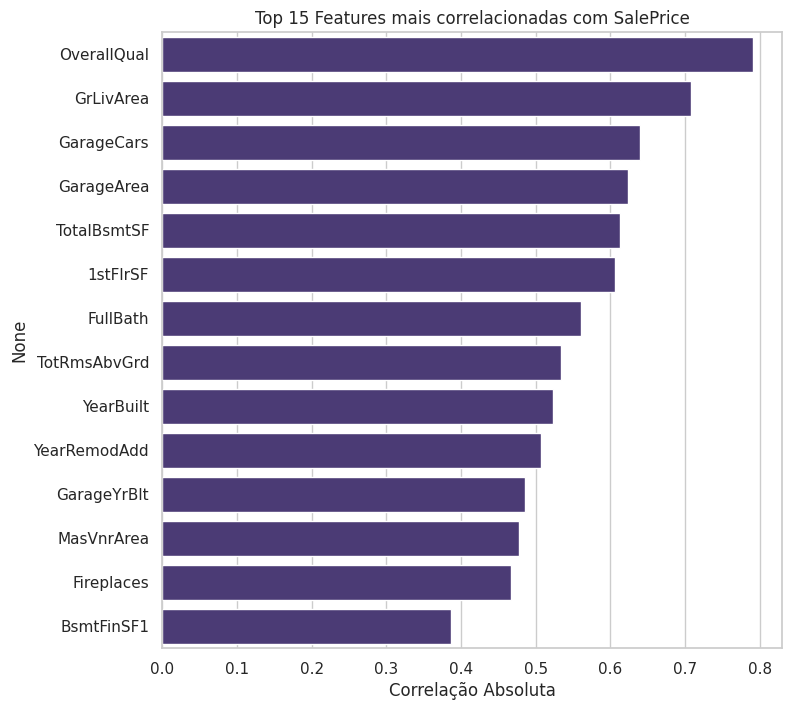

In [ ]:
# 4.3 Correlação das features com o alvo (SalePrice)

corr_target = train.corr(numeric_only=True)['SalePrice'].abs().sort_values(ascending=False)

plt.figure(figsize=(8, 8))
sns.barplot(x=corr_target[1:15], y=corr_target[1:15].index)
plt.title("Top 15 Features mais correlacionadas com SalePrice")
plt.xlabel("Correlação Absoluta")
plt.show()

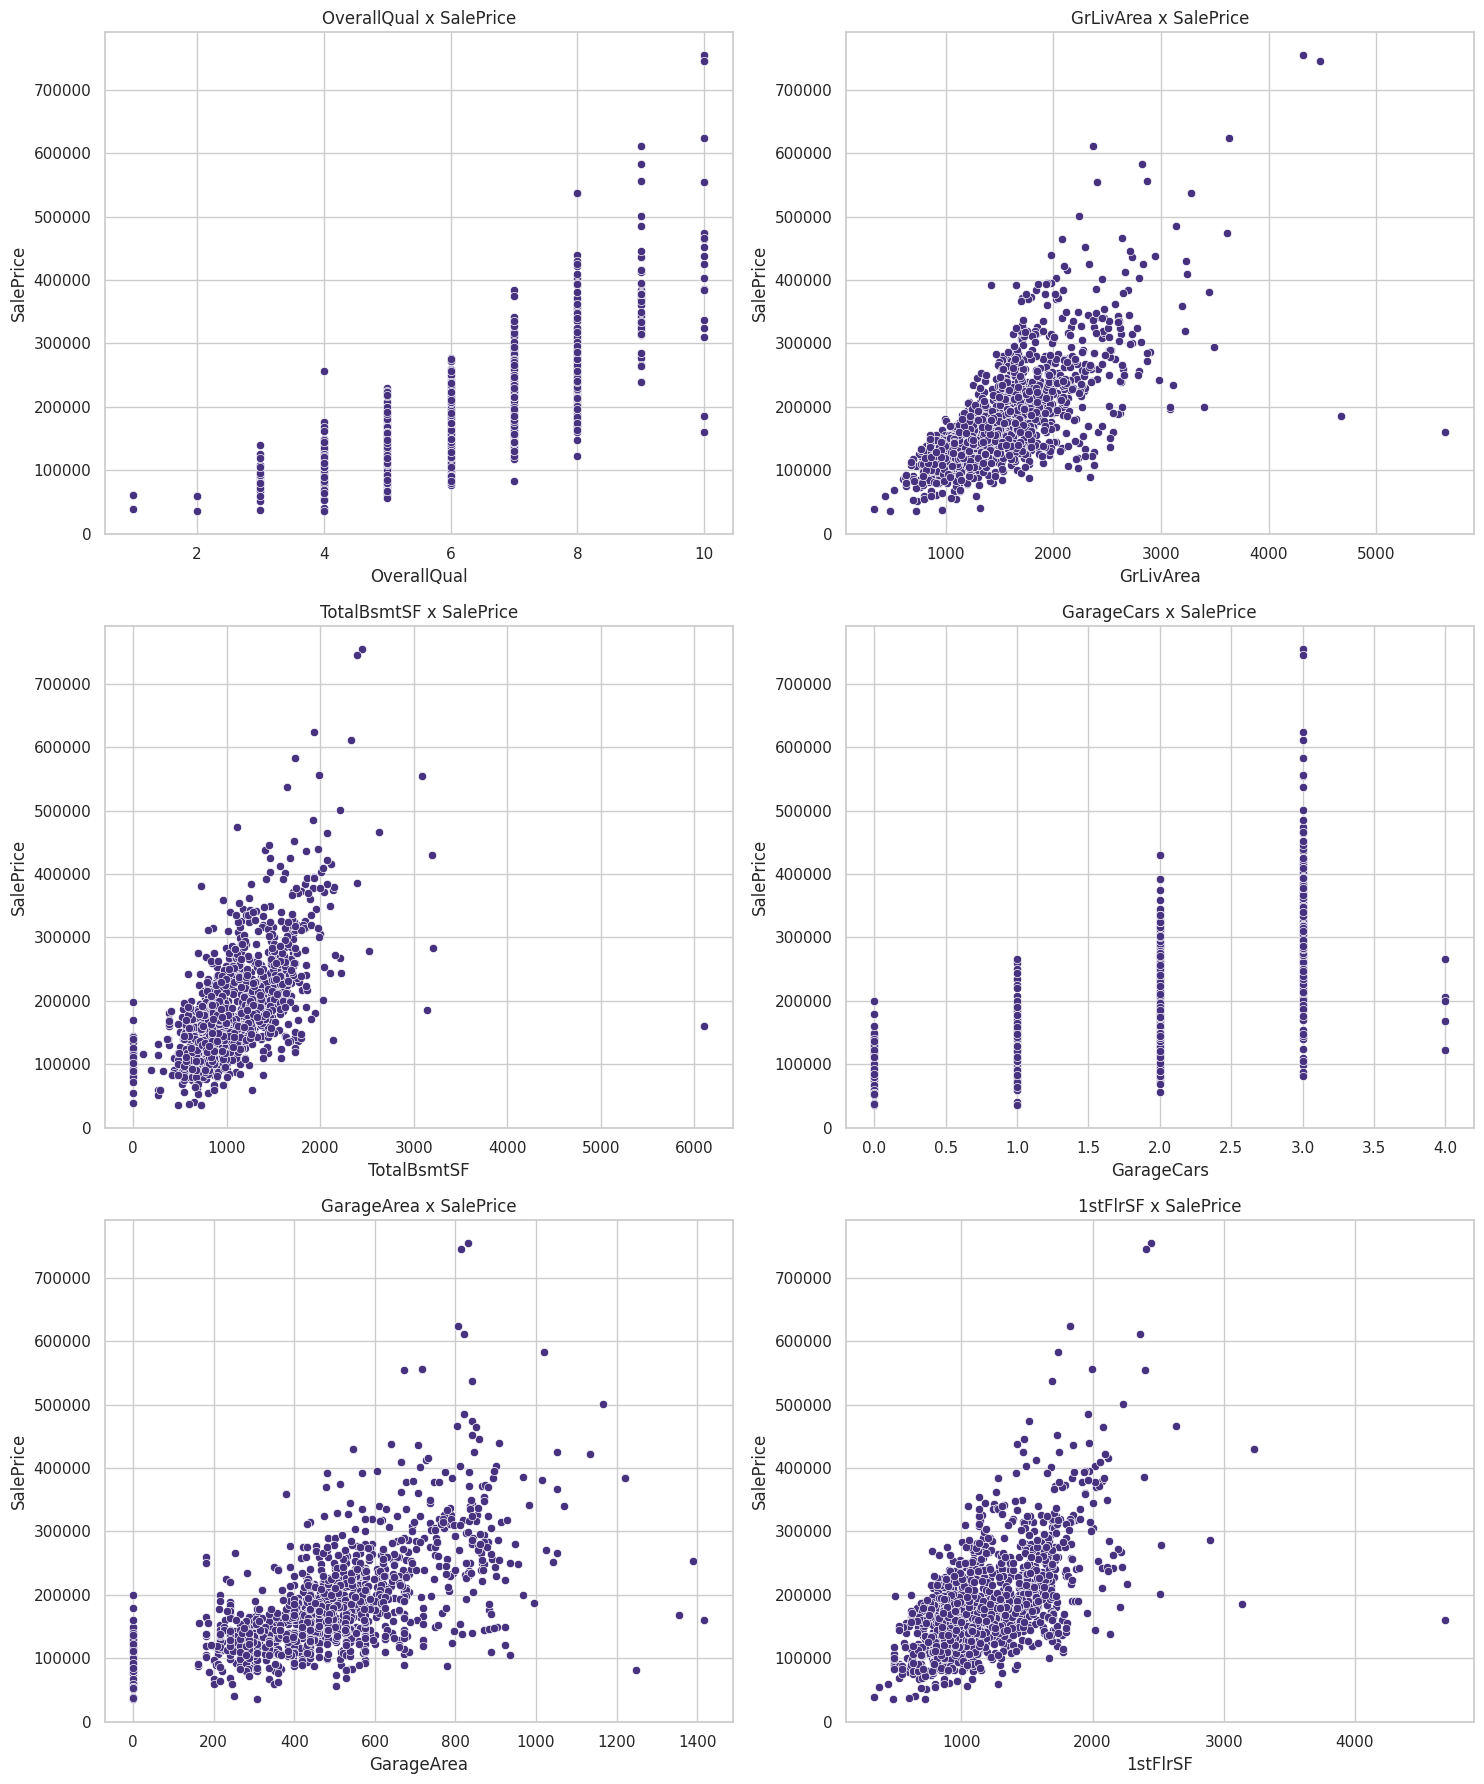

In [ ]:
# 4.4 Relação das principais variáveis com SalePrice (scatterplots)

important_features = [
    'OverallQual', 'GrLivArea', 'TotalBsmtSF',
    'GarageCars', 'GarageArea', '1stFlrSF'
]

plt.figure(figsize=(15, 18))
for i, col in enumerate(important_features):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x=train[col], y=train['SalePrice'])
    plt.title(f"{col} x SalePrice")

plt.tight_layout()
plt.show()

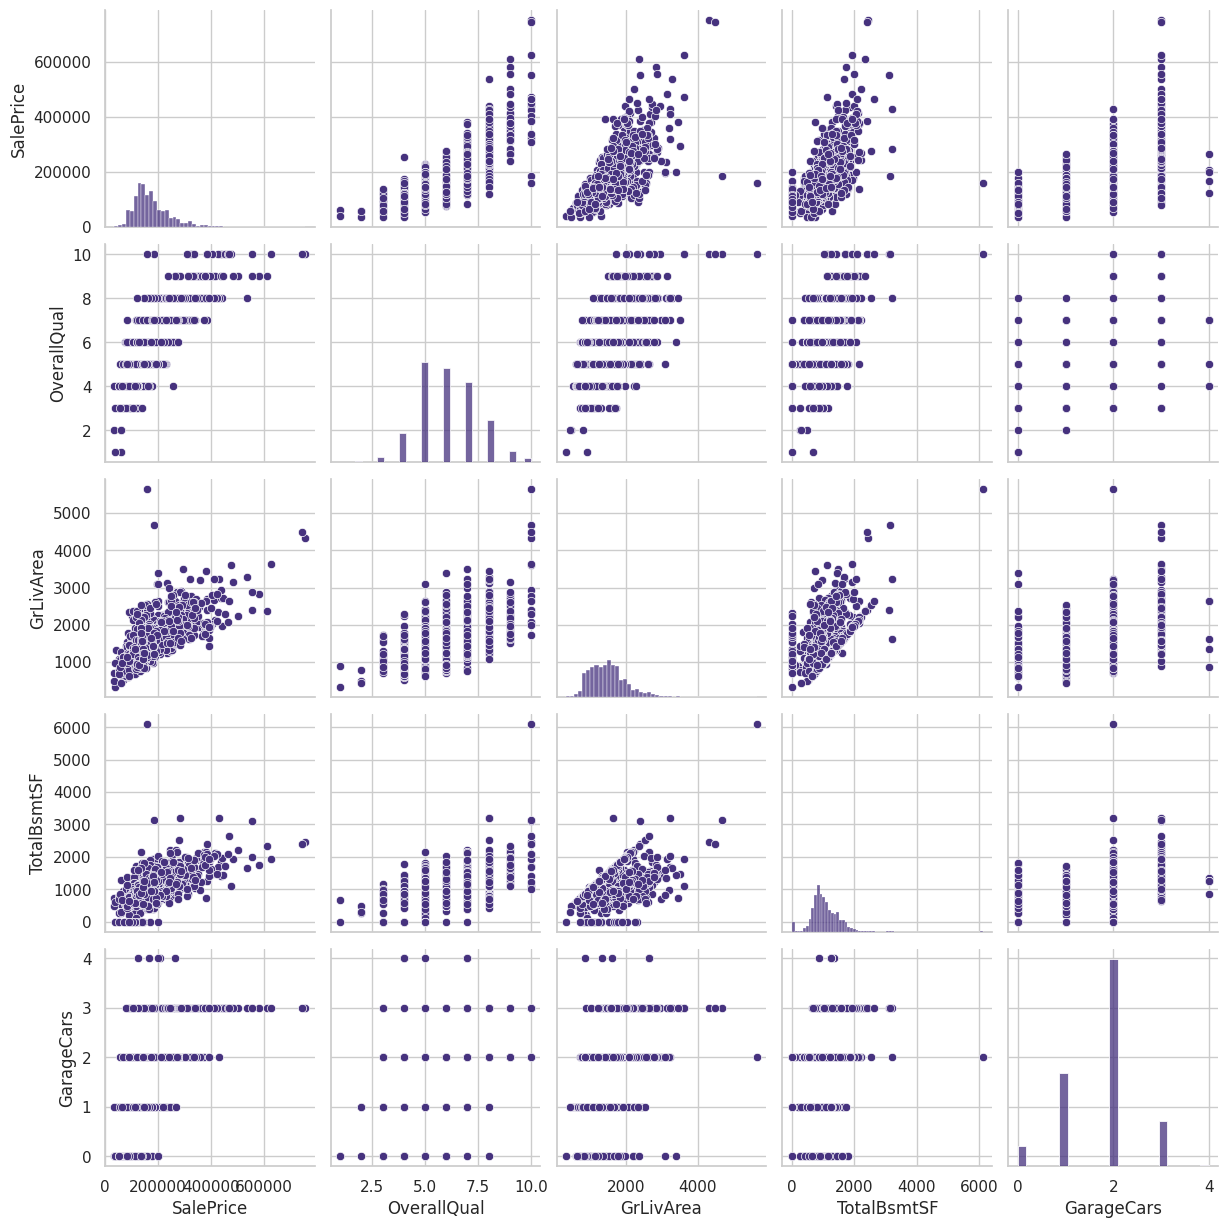

In [ ]:
# 4.5 Pairplot das features mais relevantes

sns.pairplot(train[['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars']])
plt.show()

4.6 Análise de Features

Durante a análise exploratória foram identificadas as variáveis mais relevantes para prever o preço de venda das casas.
As principais justificativas são:

OverallQual – Maior correlação com o preço. Captura qualidade global da residência.

GrLivArea – Área acima do solo. Relação linear forte com SalePrice.

TotalBsmtSF – Área do porão contribui fortemente para valor agregado.

GarageCars/GarageArea – Garagens aumentam valor percebido.

1stFlrSF e 2ndFlrSF – Área útil da casa influencia diretamente o preço.

YearBuilt e YearRemodAdd – Capturam idade e reformas, que impactam valorização.

LotArea – Terrenos maiores tendem a ter casas mais caras.

Essas variáveis foram selecionadas por:
- Alta correlação com o alvo
- Relação estrutural lógica com preço
- Boa distribuição sem excesso de missing
- Importância confirmada por estudos e kernels do Kaggle

Conclusões da Exploração e Visualização dos Dados

- A variável SalePrice apresenta forte assimetria positiva, justificando a aplicação de log-transformação nos modelos lineares.
- As variáveis mais relevantes (OverallQual, GrLivArea, TotalBsmtSF) mostram relações quase lineares com SalePrice.
- Algumas features apresentam forte presença de outliers (LotArea, TotalBsmtSF), mas geralmente são pontos válidos e não erros de medição.
- A matriz de correlação destaca grupos de variáveis altamente colineares (como 1stFlrSF e TotalBsmtSF), o que será importante ao testar modelos sensíveis à multicolinearidade.

# 5. Aplicação das Técnicas de Aprendizado de Máquina:

Justificativa de modelos:
- Imputação simples
- One-hot encoding compacto
- Validação cruzada simples

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

# 1. Separar numéricas e categóricas

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# 2. Pré-processamento simples e rápido

preprocessador = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols)
])

# 3. Modelos leves

modelos = {
    "LinearRegression": Pipeline([("prep", preprocessador),
                                  ("modelo", LinearRegression())]),

    "RandomForest": Pipeline([("prep", preprocessador),
                              ("modelo", RandomForestRegressor(n_estimators=200,
                                                               max_depth=12,
                                                               random_state=42))]),

    "LightGBM": Pipeline([("prep", preprocessador),
                          ("modelo", LGBMRegressor(
                              n_estimators=300,
                              learning_rate=0.05,
                              random_state=42
                          ))])
}

# 4. Validação Cruzada

kf = KFold(n_splits=5, shuffle=True, random_state=42)

resultados = []

for nome, modelo in modelos.items():
    print(f"Treinando modelo: {nome}")

    rmse = np.sqrt(-cross_val_score(
        modelo, X, y,
        scoring="neg_mean_squared_error",
        cv=kf
    )).mean()

    mae = -cross_val_score(
        modelo, X, y,
        scoring="neg_mean_absolute_error",
        cv=kf
    ).mean()

    r2 = cross_val_score(
        modelo, X, y,
        scoring="r2",
        cv=kf
    ).mean()

    resultados.append([nome, rmse, mae, r2])

# 5. Tabela de comparação

df_resultados = pd.DataFrame(resultados, columns=["Modelo", "RMSE", "MAE", "R²"])
print(df_resultados)


Treinando modelo: LinearRegression
Treinando modelo: RandomForest
Treinando modelo: LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3473
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 194
[LightGBM] [Info] Start training from score 181441.541952


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3472
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 197
[LightGBM] [Info] Start training from score 179651.292808


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3456
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 193
[LightGBM] [Info] Start training from score 181104.263699


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3468
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 195
[LightGBM] [Info] Start training from score 181327.004281


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3469
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 192
[LightGBM] [Info] Start training from score 181081.876712


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3473
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 194
[LightGBM] [Info] Start training from score 181441.541952


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3472
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 197
[LightGBM] [Info] Start training from score 179651.292808


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3456
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 193
[LightGBM] [Info] Start training from score 181104.263699


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3468
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 195
[LightGBM] [Info] Start training from score 181327.004281


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3469
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 192
[LightGBM] [Info] Start training from score 181081.876712


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3473
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 194
[LightGBM] [Info] Start training from score 181441.541952


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3472
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 197
[LightGBM] [Info] Start training from score 179651.292808


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3456
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 193
[LightGBM] [Info] Start training from score 181104.263699


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3468
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 195
[LightGBM] [Info] Start training from score 181327.004281


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3469
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 192
[LightGBM] [Info] Start training from score 181081.876712
             Modelo          RMSE           MAE        R²
0  LinearRegression  41222.307645  18707.343693  0.705549
1      RandomForest  30464.368792  17951.630486  0.838792
2          LightGBM  29767.363043  16809.306827  0.847126


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


# 6. Avaliação dos Resultados

Discussão dos resultados obtidos e interpretação


Foram aplicadas diferentes técnicas de Aprendizado de Máquina com o objetivo de construir, comparar e validar modelos capazes de prever a variável-alvo do projeto. Para isso, três algoritmos com características distintas foram utilizados: Linear Regression, Random Forest Regressor e LightGBM Regressor.

A seguir, apresento a interpretação dos resultados obtidos:

1. Regressão Linear

A regressão linear foi utilizada como modelo base, servindo como referência para avaliar a qualidade dos modelos mais complexos. Os resultados foram:

RMSE: 41.222

MAE: 18.707

R²: 0.705

O desempenho mostra que o modelo consegue capturar aproximadamente 70% da variação da variável alvo, mas ainda apresenta erros altos. Isso era esperado, já que a regressão linear assume relações estritamente lineares, o que geralmente limita sua capacidade de capturar padrões mais complexos nos dados.
Portanto, a regressão linear cumpre seu papel de baseline, mas não é o modelo mais adequado para o contexto.

2. Random Forest

O Random Forest apresentou uma melhora em relação à regressão linear, com métricas mais robustas e maior capacidade de generalização:

RMSE: 30.464

MAE: 17.951

R²: 0.839

O modelo passou a explicar quase 84% da variância, apresentando erros menores. Isso ocorre porque o Random Forest é um modelo não linear, capaz de capturar interações e padrões complexos entre as variáveis sem necessidade de pré-transformações.
Trata-se de um modelo estável e que costuma funcionar bem em uma variedade de problemas supervisionados.

3. LightGBM – Melhor Modelo

Por fim, o modelo LightGBM (Light Gradient Boosting Machine) obteve o melhor desempenho entre todos os avaliados:

RMSE: 29.767

MAE: 16.809

R²: 0.847

O LightGBM conseguiu explicar cerca de 85% da variância da variável alvo, apresentando os menores valores de erro. Isso ocorre porque o algoritmo utiliza técnicas avançadas de boosting, que aprendem iterativamente os padrões mais difíceis, ajustando os erros residuais dos modelos anteriores.

Além disso, o LightGBM é altamente eficiente para datasets com muitas features, cenário compatível com o conjunto usado no experimento.

Dessa forma, o LightGBM foi o modelo mais preciso e eficiente, sendo considerado o melhor candidato para a etapa de implantação ou para análises preditivas futuras.

## 7. Conclusões & Próximos Passos

Ao longo do projeto, foi desenvolvido desde a exploração inicial até a aplicação de modelos de aprendizado de máquina.

Os principais achados foram:

- Comportamento da Variável Alvo: A análise exploratória revelou distribuição heterogênea e presença de dispersão considerável, reforçando a necessidade de modelos capazes de capturar relações não lineares.

- Qualidade dos Dados: A verificação de valores faltantes e inconsistências mostrou que o conjunto de dados estava apto para uso após etapas de tratamento básico.

- Modelagem e Desempenho:
1. Regressão Linear serviu como baseline, explicando cerca de 70% da variância, mas com erros ainda elevados.
2. Random Forest trouxe melhoria, explicando aproximadamente 84% da variância, com redução no erro.
3. LightGBM apresentou o melhor desempenho, com:
Menor RMSE,
Menor MAE,
Maior R² (~0.85).

Isso indica que o algoritmo gradient boosting foi capaz de capturar padrões complexos presentes nos dados, oferecendo o melhor equilíbrio entre precisão e robustez.

Validação Cruzada: As métricas foram consistentes entre todos os folds avaliados, mostrando que os modelos, principalmente o LightGBM, apresentam boa capacidade de generalização. No geral, o projeto conseguiu identificar um modelo preditivo eficaz e confiável.

- Próximos Passos: Embora o modelo final tenha apresentado excelente desempenho, há possibilidades de evolução e aprofundamento, como:

1. Otimização dos Hiperparâmetros: Aplicar Grid Search, Random Search ou Bayesian Optimization no LightGBM pode aumentar ainda mais a performance, reduzindo erros residuais.
2. Engenharia de Atributos: Criar novas variáveis derivadas de interações entre features, transformações não lineares, agrupamentos estatísticos, para ampliar a capacidade explicativa dos modelos.
3. Testar Outros Algoritmos: Explorar modelos como XGBoost, CatBoost, Redes Neurais.
4. Análise de Resíduos: Os resíduos do modelo podem mostrar: regiões onde o modelo erra mais, possíveis variáveis ocultas, necessidade de segmentar a base.


## 8. Reprodutibilidade e GitHub

Para realizar esta análise, começamos carregando a base de dados original e verificando sua estrutura, avaliando os tipos das variáveis, valores faltantes e estatísticas descritivas. Em seguida, exploramos a distribuição da variável alvo e das demais features, identificando padrões, possíveis outliers, correlações e comportamentos relevantes. As visualizações permitiram observar relações importantes entre as variáveis e fundamentar a escolha das features utilizadas posteriormente.

O pré-processamento incluiu o tratamento de valores faltantes, normalização e conversão de colunas categóricas para formatos adequados à análise. Também avaliamos quais variáveis realmente contribuíam para o entendimento do problema, justificando a seleção final das features.

Para reproduzir todo o processo, outro usuário precisa apenas:
- Instalar Python e as bibliotecas padrão de análise de dados (pandas, numpy, matplotlib, seaborn e scikit-learn);
- Colocar o arquivo CSV original na mesma pasta do script/notebook;
- Executar as etapas na mesma ordem: leitura dos dados, checagens iniciais, pré-processamento, exploração visual e análise das relações entre as variáveis.

Seguindo essa sequência, com os mesmos parâmetros e transformações, qualquer pessoa conseguirá chegar exatamente aos mesmos resultados, garantindo total reprodutibilidade da análise.

Link do Projeto no Github: https://github.com/vitormaestripaiva30-afk/House-Prices-Kaggle-Reconhecimento-de-Padroes

### Referências

- Página da competição no Kaggle: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques.
- Notebooks de referência e tutoriais do Kaggle sobre House Prices.
